# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()  
%matplotlib inline

In [3]:
from scipy import stats

In [4]:
sns.set_style('whitegrid')
sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [5]:
df=pd.read_csv("bank_marketing_part1_Data.csv")
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [6]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [7]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
df.shape

(210, 7)

In [10]:
df.size

1470

In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
dupes =df.duplicated()
dupes.sum()


0

In [13]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

 ## UNIVARIATE ANALYSIS

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


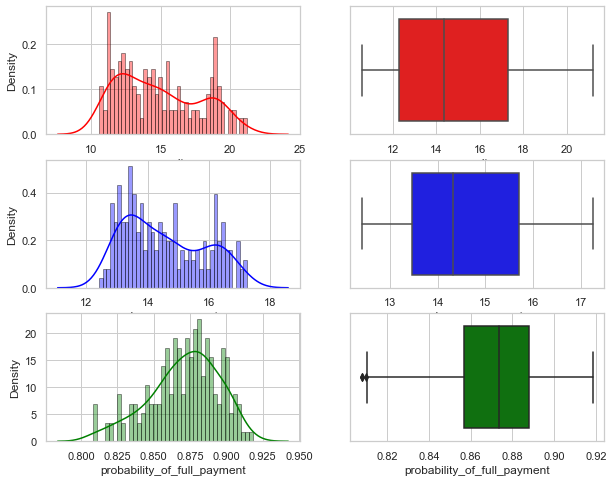

In [15]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10,8))
sns.distplot(df['spending'], bins = 40, ax = axs[0][0],color="red",hist_kws= dict(ec = 'black'));
sns.distplot(df['advance_payments'], bins = 40, ax = axs[1][0], color= "blue",hist_kws= dict(ec = 'black'));
sns.distplot(df['probability_of_full_payment'], bins = 40, ax = axs[2][0], color= "green",hist_kws= dict(ec = 'black'));


sns.boxplot(df['spending'], ax = axs[0][1],color="red");
sns.boxplot(df['advance_payments'], ax = axs[1][1], color= 'blue');
sns.boxplot(df['probability_of_full_payment'], ax = axs[2][1], color= "green");


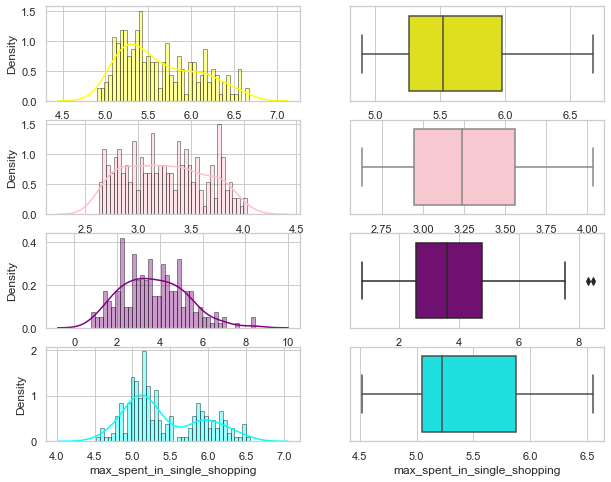

In [16]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (10,8))
sns.distplot(df['current_balance'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[0][0], color= 'yellow');
sns.distplot(df['credit_limit'], bins = 40, hist_kws= dict(ec = 'black'), ax =axs[1][0], color= 'pink');
sns.distplot(df['min_payment_amt'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[2][0], color = 'purple');
sns.distplot(df['max_spent_in_single_shopping'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[3][0], color= 'cyan');

sns.boxplot(df['current_balance'], ax = axs[0][1], color= 'yellow');
sns.boxplot(df['credit_limit'], ax = axs[1][1], color= 'pink');
sns.boxplot(df['min_payment_amt'], ax = axs[2][1], color = 'purple');
sns.boxplot(df['max_spent_in_single_shopping'], ax = axs[3][1], color='cyan' );


Spending variable

In [17]:
print('Range of values: ', df['spending'].max()-df['spending'].min())
print('Minimum spending: ', df['spending'].min())
print('Maximum spending: ',df['spending'].max())
print('Mean value: ', df['spending'].mean())
print('Median value: ',df['spending'].median())
print('Standard deviation: ', df['spending'].std())
print('Null values: ',df['spending'].isnull().any())

Range of values:  10.59
Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [18]:
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('1st Quartile (Q1) of spending is: ', Q1)
print('3rd Quartile (Q3) of spending is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df['spending']))

1st Quartile (Q1) of spending is:  12.27
3rd Quartile (Q3) of spending is:  17.305
Interquartile range (IQR) of spending is  5.035


In [19]:

#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', Lower_outliers)
print('Upper outliers in spending: ', Upper_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [20]:
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())        #checking outliers
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(df[df['spending']>24.8575]['spending'].count()*100/len(df)), '%')
print('% of Outlier in spending lower: ',round(df[df['spending']<4.717499]['spending'].count()*100/len(df)), '%')

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


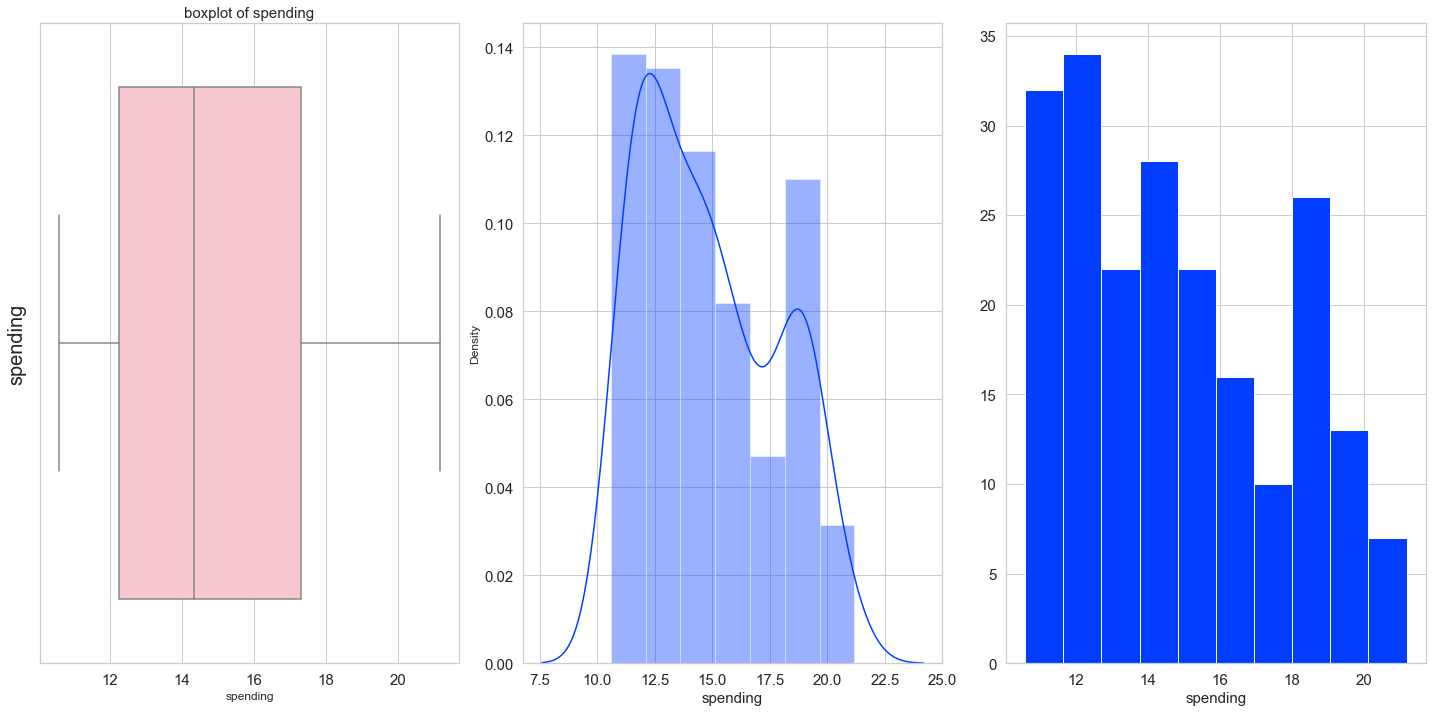

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='spending',data=df,color="pink",orient='h',ax=ax1)
ax1.set_ylabel('spending', fontsize=20)
ax1.set_title('boxplot of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2,kde=True)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

advance_payments variable

In [22]:
print('Range of values: ', df['advance_payments'].max()-df['spending'].min())
print('Minimum advance payments: ', df['advance_payments'].min())
print('Maximum advance payments: ',df['advance_payments'].max())
print('Mean value: ', df['advance_payments'].mean())
print('Median value: ',df['advance_payments'].median())
print('Standard deviation: ', df['advance_payments'].std())
print('Null values: ',df['advance_payments'].isnull().any())

Range of values:  6.66
Minimum advance payments:  12.41
Maximum advance payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [23]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('1st Quartile (Q1) of advance_payments is: ', Q1)
print('3rd Quartile (Q3) of advance_payments is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df['spending']))

1st Quartile (Q1) of advance_payments is:  13.45
3rd Quartile (Q3) of advance_payments is:  15.715
Interquartile range (IQR) of advance_payments is  5.035


In [24]:

#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', Lower_outliers)
print('Upper outliers in advance_payments: ', Upper_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [25]:
print('Number of outliers in advance_payments upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())        #checking outliers
print('Number of outliers in advance_payments lower : ', df[df['advance_payments']<10.05]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ',round(df[df['advance_payments']>19.1125]['advance_payments'].count()*100/len(df)), '%')
print('% of Outlier in advance_payments lower: ',round(df[df['advance_payments']<10.05]['advance_payments'].count()*100/len(df)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %


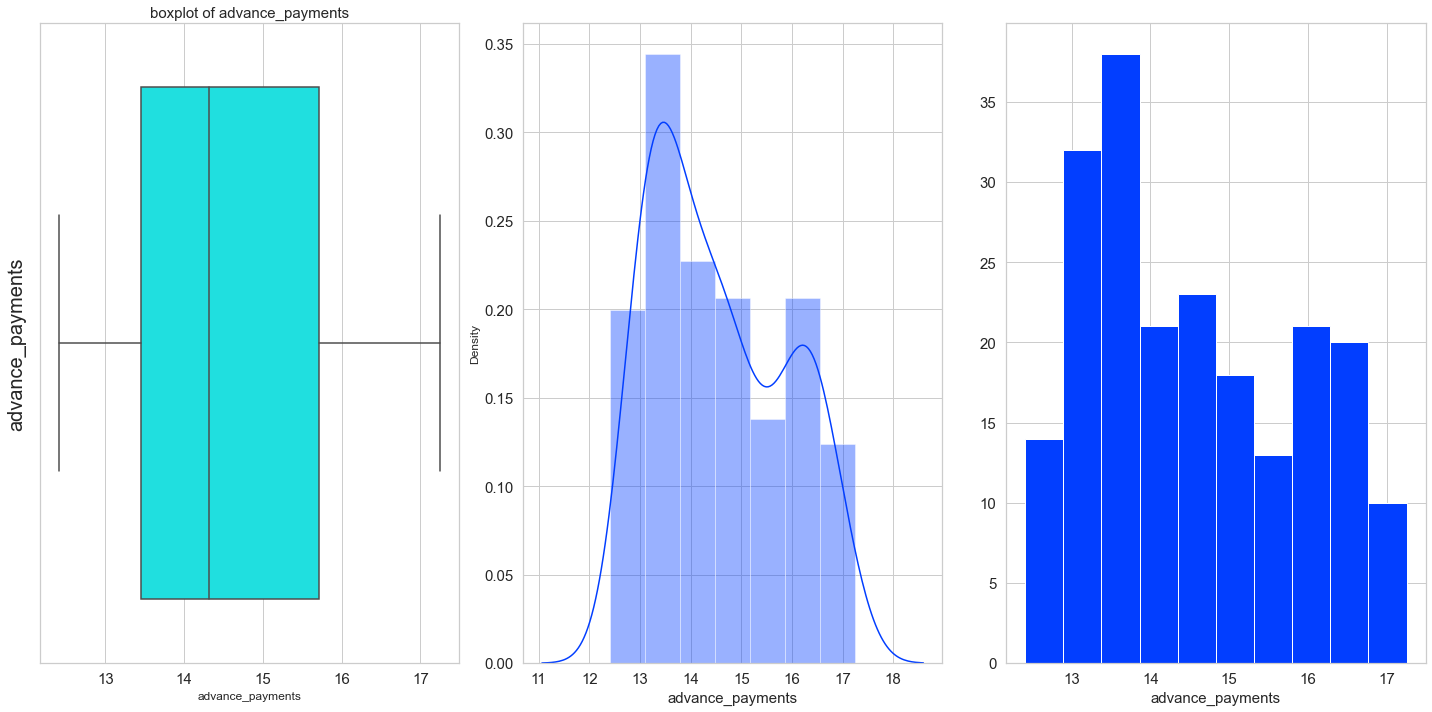

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='advance_payments',data=df,color="cyan",orient='h',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=20)
ax1.set_title('boxplot of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2,kde=True)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

probability_of_full_payment variable

In [27]:
print('Range of values: ', df['probability_of_full_payment'].max()-df['spending'].min())
print('Minimum probability of full payment: ', df['probability_of_full_payment'].min())
print('Maximum probability of full payment: ',df['probability_of_full_payment'].max())
print('Mean value: ', df['probability_of_full_payment'].mean())
print('Median value: ',df['probability_of_full_payment'].median())
print('Standard deviation: ', df['probability_of_full_payment'].std())
print('Null values: ',df['probability_of_full_payment'].isnull().any())

Range of values:  -9.6717
Minimum probability of full payment:  0.8081
Maximum probability of full payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [28]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('1st Quartile (Q1) of probability_of_full_payment is: ', Q1)
print('3rd Quartile (Q3) of probability_of_full_payment is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))

1st Quartile (Q1) of probability_of_full_payment is:  0.8569
3rd Quartile (Q3) of probability_of_full_payment is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [29]:
#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', Lower_outliers)
print('Upper outliers in probability_of_full_payment: ', Upper_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [30]:
print('Number of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.934]['probability_of_full_payment'].count())        #checking outliers
print('Number of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']<0.810]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(df[df['probability_of_full_payment']>0.934]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(df[df['probability_of_full_payment']<0.810]['probability_of_full_payment'].count()*100/len(df)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


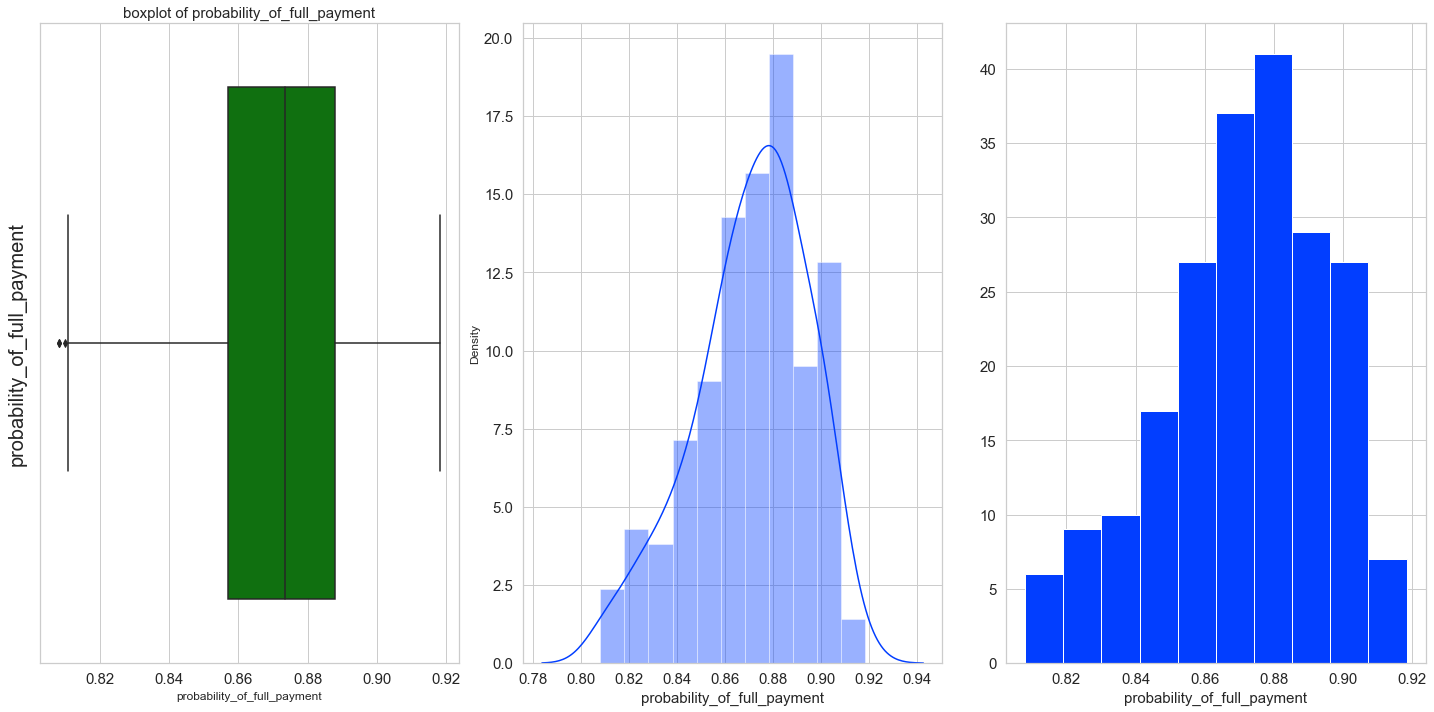

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,color="green",orient='h',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=20)
ax1.set_title('boxplot of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2,kde=True)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

current_balance variable

In [32]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Standard deviation: ', df['current_balance'].std())
print('Null values: ',df['current_balance'].isnull().any())

Range of values:  1.7759999999999998
Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [33]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('1st Quartile (Q1) of current_balance ', Q1)
print('3rd Quartile (Q3) of current_balance is: ', Q3)
print('Interquartile range (IQR) of  is current_balance', stats.iqr(df['current_balance']))

1st Quartile (Q1) of current_balance  5.26225
3rd Quartile (Q3) of current_balance is:  5.97975
Interquartile range (IQR) of  is current_balance 0.7175000000000002


In [34]:
#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', Lower_outliers)
print('Upper outliers in current_balance: ', Upper_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [35]:
print('Number of outliers in  current_balance : ', df[df['current_balance']>7.056]['current_balance'].count())        #checking outliers
print('Number of outliers in  current_balance : ', df[df['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in  current_balance: ',round(df[df['current_balance']>7.056]['current_balance'].count()*100/len(df)), '%')
print('% of Outlier in  current_balance: ',round(df[df['current_balance']<4.186]['current_balance'].count()*100/len(df)), '%')

Number of outliers in  current_balance :  0
Number of outliers in  current_balance :  0
% of Outlier in  current_balance:  0 %
% of Outlier in  current_balance:  0 %


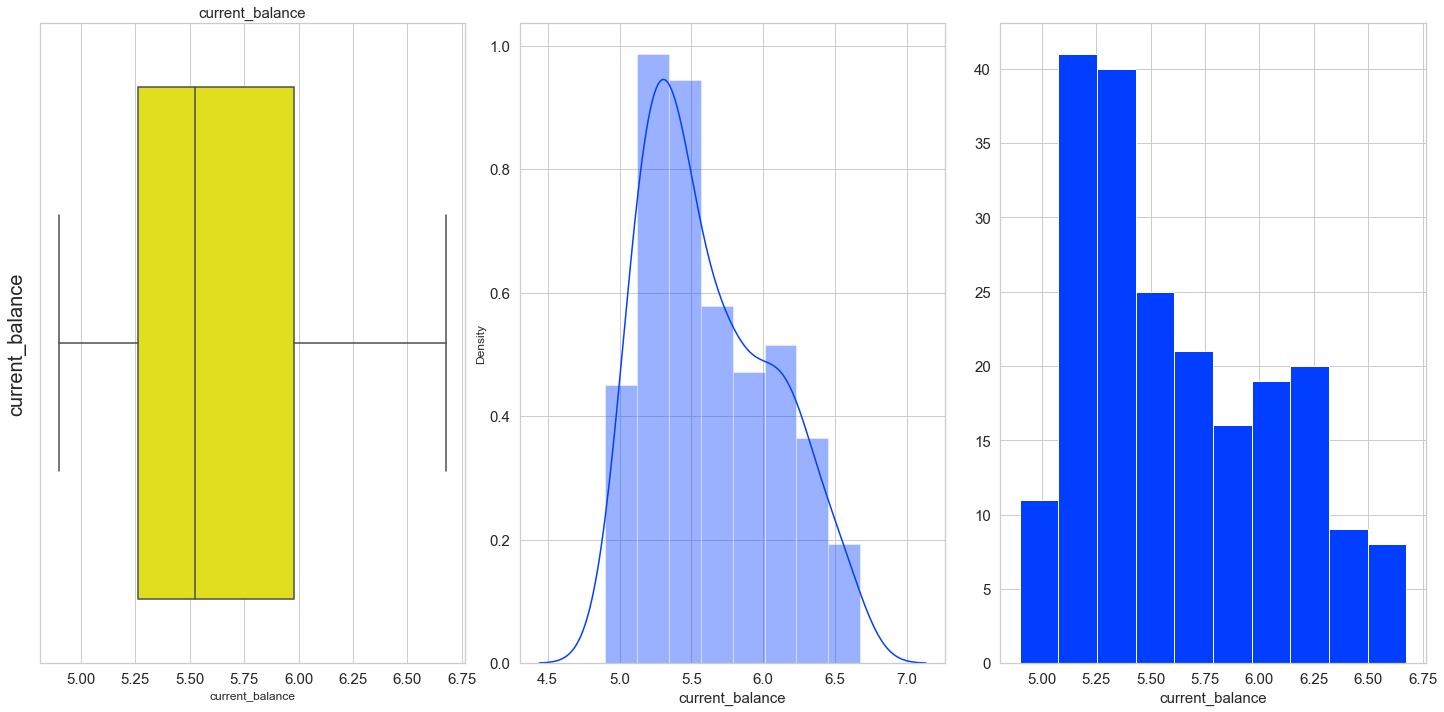

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='current_balance',data=df,color="yellow",orient='h',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=20)
ax1.set_title('current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df["current_balance"],ax=ax2,kde=True)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df["current_balance"])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

credit_limit variable

In [37]:
print('Range of values: ', df["credit_limit"].max()-df['credit_limit'].min())
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Standard deviation: ', df['credit_limit'].std())
print('Null values: ',df['credit_limit'].isnull().any())

Range of values:  1.4030000000000005
Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [38]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('1st Quartile (Q1) of credit_limit ', Q1)
print('3rd Quartile (Q3) of credit_limit is: ', Q3)
print('Interquartile range (IQR) of  is credit_limit', stats.iqr(df['credit_limit']))

1st Quartile (Q1) of credit_limit  2.944
3rd Quartile (Q3) of credit_limit is:  3.56175
Interquartile range (IQR) of  is credit_limit 0.61775


In [39]:
#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', Lower_outliers)
print('Upper outliers in credit_limit: ', Upper_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [40]:
print('Number of outliers in  credit_limit : ', df[df['credit_limit']>4.488]['credit_limit'].count())        #checking outliers
print('Number of outliers in  credit_limit : ', df[df['credit_limit']<2.017]['credit_limit'].count())
print('% of Outlier in credit_limit: ',round(df[df['credit_limit']>4.488]['credit_limit'].count()*100/len(df)), '%')
print('% of Outlier in credit_limit: ',round(df[df["credit_limit"]<2.017]['credit_limit'].count()*100/len(df)), '%')

Number of outliers in  credit_limit :  0
Number of outliers in  credit_limit :  0
% of Outlier in credit_limit:  0 %
% of Outlier in credit_limit:  0 %


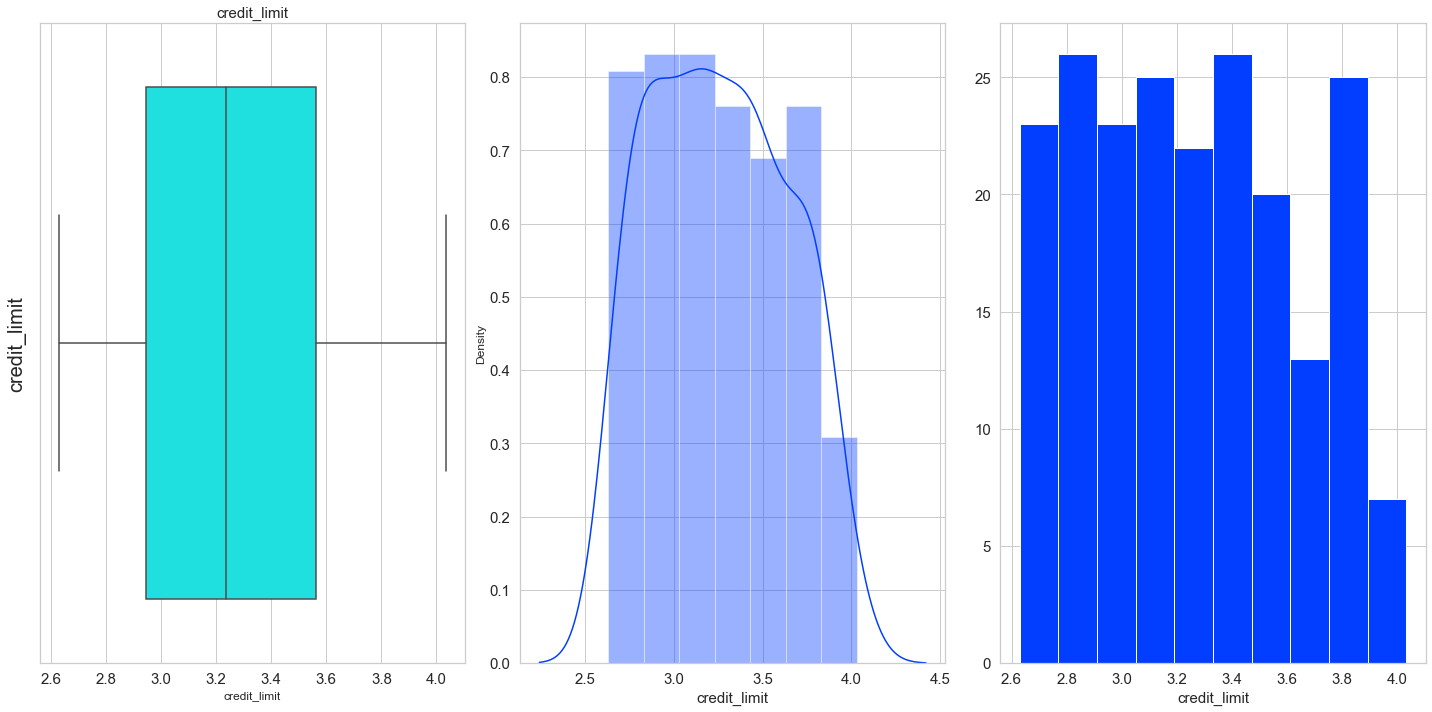

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='credit_limit',data=df,color="cyan",orient='h',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=20)
ax1.set_title('credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df["credit_limit"],ax=ax2,kde=True)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df["credit_limit"])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

min_payment_amt variable

In [42]:
print('Range of values: ', df["min_payment_amt"].max()-df['min_payment_amt'].min())
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Standard deviation: ', df['min_payment_amt'].std())
print('Null values: ',df['min_payment_amt'].isnull().any())

Range of values:  7.690899999999999
Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [43]:
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('1st Quartile (Q1) of min_payment_amt ', Q1)
print('3rd Quartile (Q3) of min_payment_amt is: ', Q3)
print('Interquartile range (IQR) of  is min_payment_amt', stats.iqr(df['min_payment_amt']))

1st Quartile (Q1) of min_payment_amt  2.5615
3rd Quartile (Q3) of min_payment_amt is:  4.76875
Interquartile range (IQR) of  is min_payment_amt 2.2072499999999997


In [44]:
#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt', Lower_outliers)
print('Upper outliers in min_payment_amt', Upper_outliers)

Lower outliers in min_payment_amt -0.7493749999999992
Upper outliers in min_payment_amt 8.079625


In [45]:
print('Number of outliers in min_payment_amt : ', df[df['min_payment_amt']>8.079]['min_payment_amt'].count())        #checking outliers
print('Number of outliers in min_payment_amt : ', df[df['min_payment_amt']<-0.749]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt: ',round(df[df['min_payment_amt']>8.079]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt: ',round(df[df["min_payment_amt"]<-0.749]['min_payment_amt'].count()*100/len(df)), '%')

Number of outliers in min_payment_amt :  2
Number of outliers in min_payment_amt :  0
% of Outlier in min_payment_amt:  1 %
% of Outlier in min_payment_amt:  0 %


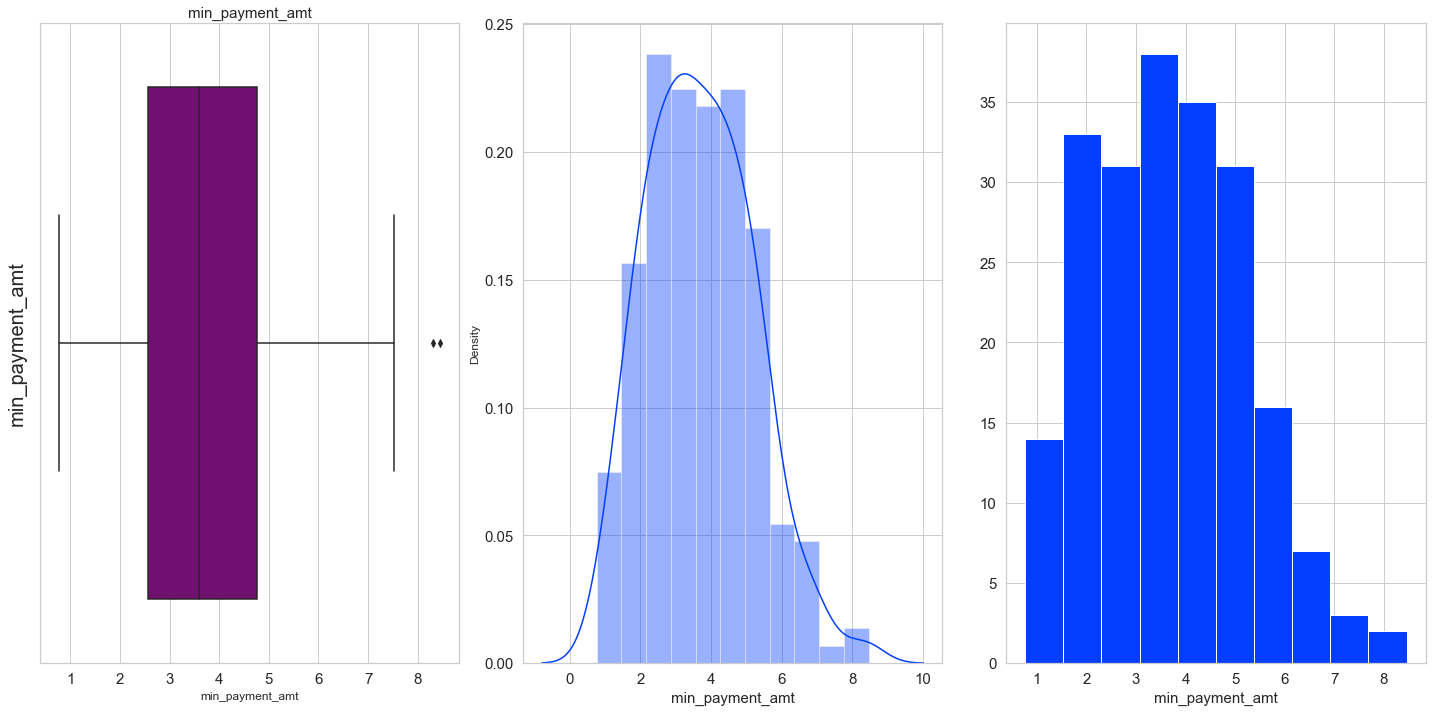

In [46]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,color="purple",orient='h',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=20)
ax1.set_title('min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df["min_payment_amt"],ax=ax2,kde=True)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df["min_payment_amt"])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

max_spent_in_single_shopping variable

In [47]:
print('Range of values: ', df["max_spent_in_single_shopping"].max()-df['max_spent_in_single_shopping'].min())
print('Minimum max_spent_in_single_shopping:', df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shopping:',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())
print('Null values: ',df['max_spent_in_single_shopping'].isnull().any())

Range of values:  2.0309999999999997
Minimum max_spent_in_single_shopping: 4.519
Maximum max_spent_in_single_shopping: 6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [48]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('1st Quartile (Q1) of max_spent_in_single_shopping', Q1)
print('3rd Quartile (Q3) of max_spent_in_single_shopping is: ', Q3)
print('Interquartile range (IQR) of  is max_spent_in_single_shopping', stats.iqr(df['max_spent_in_single_shopping']))

1st Quartile (Q1) of max_spent_in_single_shopping 5.045
3rd Quartile (Q3) of max_spent_in_single_shopping is:  5.877
Interquartile range (IQR) of  is max_spent_in_single_shopping 0.8319999999999999


In [49]:
#lower whisker i.e Q1-1.5*IQR
#upper whisker i.e Q3+1.5*IQR
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping', Lower_outliers)
print('Upper outliers in max_spent_in_single_shopping', Upper_outliers)

Lower outliers in max_spent_in_single_shopping 3.797
Upper outliers in max_spent_in_single_shopping 7.125


In [50]:
print('Number of outliers in max_spent_in_single_shopping: ', df[df['max_spent_in_single_shopping']>7.125]['max_spent_in_single_shopping'].count())        #checking outliers
print('Number of outliers in  max_spent_in_single_shopping : ', df[df['max_spent_in_single_shopping']<3.797]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping: ',round(df[df["max_spent_in_single_shopping"]>7.125]['max_spent_in_single_shopping'].count()*100/len(df)), '%')
print('% of Outlier in max_spent_in_single_shopping: ',round(df[df["max_spent_in_single_shopping"]<3.797]['max_spent_in_single_shopping'].count()*100/len(df)), '%')

Number of outliers in max_spent_in_single_shopping:  0
Number of outliers in  max_spent_in_single_shopping :  0
% of Outlier in max_spent_in_single_shopping:  0 %
% of Outlier in max_spent_in_single_shopping:  0 %


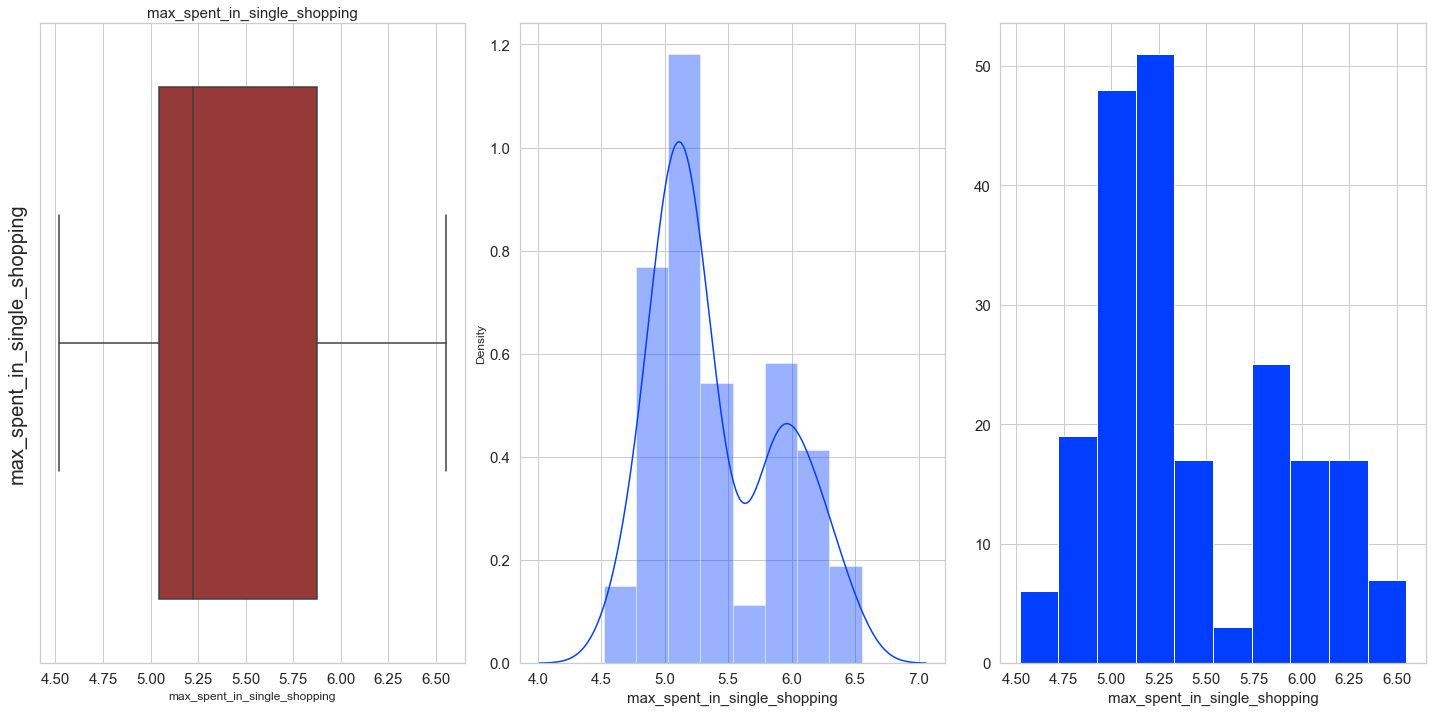

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,color="brown",orient='h',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=20)
ax1.set_title('max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df["max_spent_in_single_shopping"],ax=ax2,kde=True)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df["max_spent_in_single_shopping"])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [52]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)


max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

MULTIVARIATE ANALYSIS 
CHECK FOR MULTICOLLINEARITY:

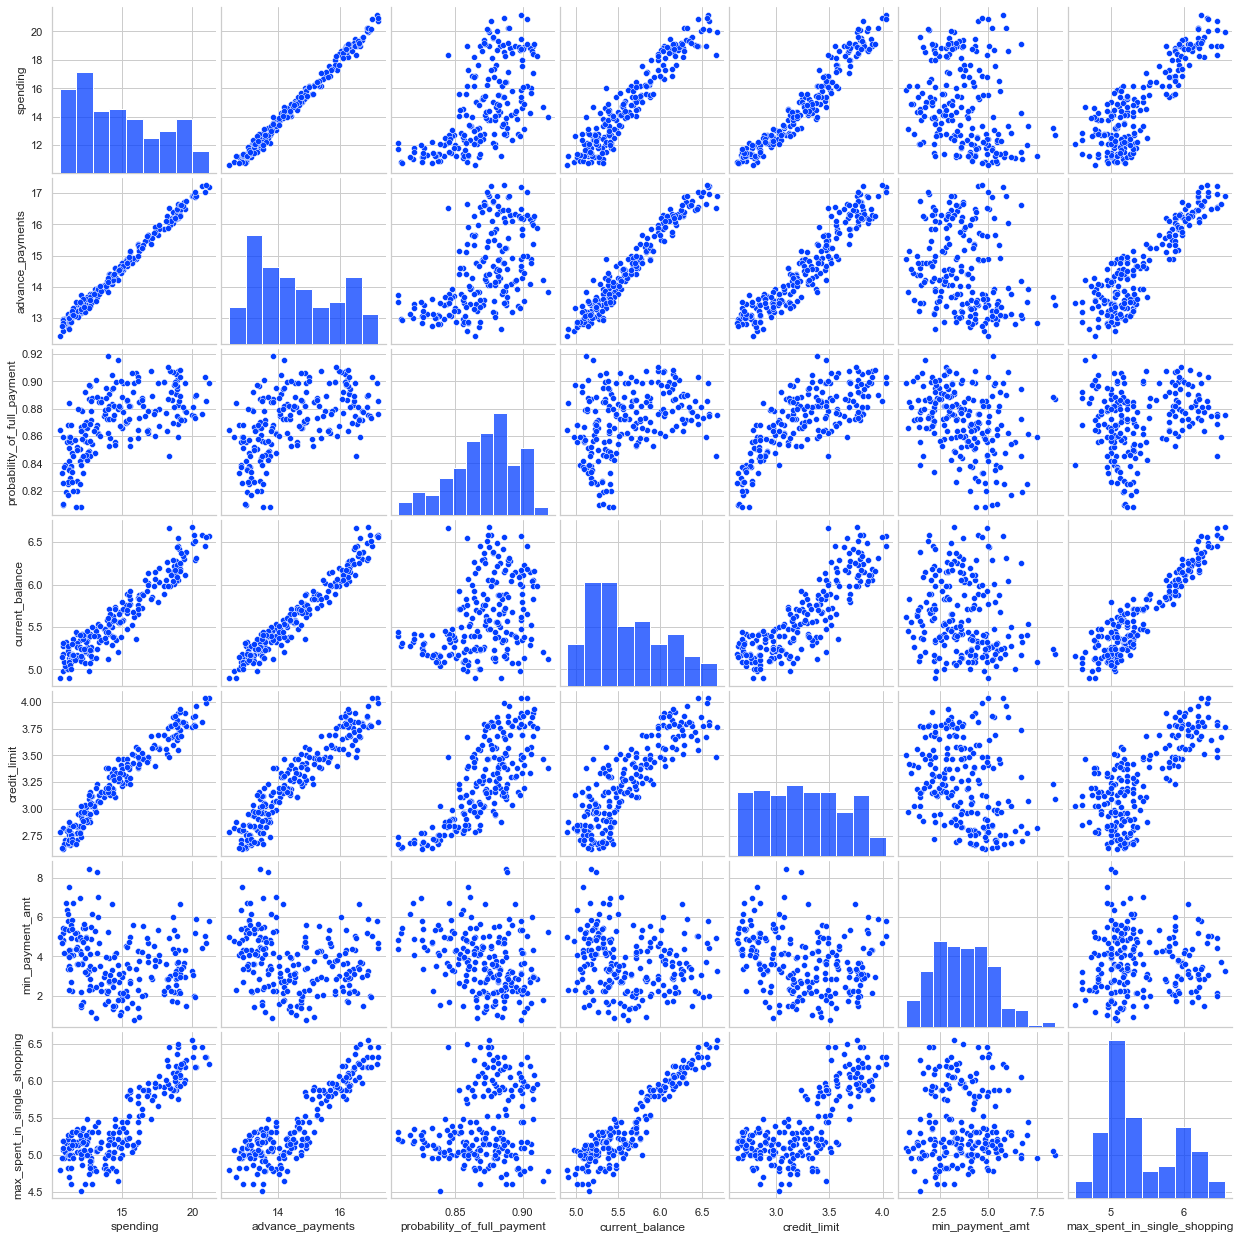

In [53]:
sns.pairplot(df)


In [54]:
corr=df.corr().T
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


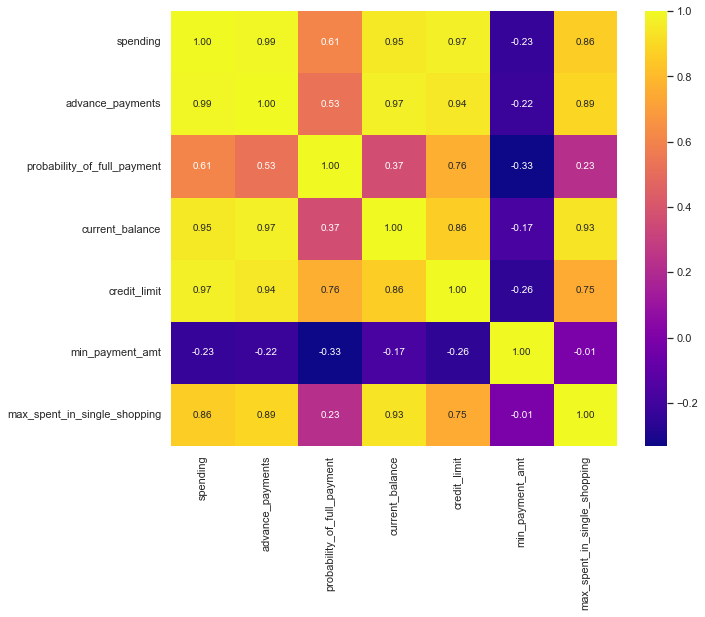

In [55]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="plasma")
plt.show()


OUTLIER TREATMENT

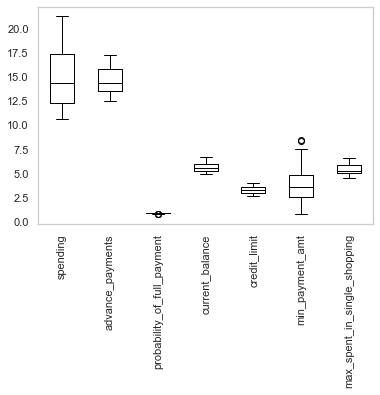

<Figure size 2880x1440 with 0 Axes>

In [56]:
df.boxplot(column=["spending","advance_payments","probability_of_full_payment","current_balance","credit_limit","min_payment_amt","max_spent_in_single_shopping"],grid=False, rot=90,color='black')
plt.figure(figsize =(40,20))
plt.tight_layout()

It seems that "probability_of_full_payment" and "min_payment_amt" have outliers.These outliers need to be treated.

In [57]:
def detectoutlier(col):      #Defined new function detectoulier
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [58]:
lr,ur=detectoutlier(df["probability_of_full_payment"])
df["probability_of_full_payment"]=np.where(df["probability_of_full_payment"]>ur,ur,df["probability_of_full_payment"])


In [59]:
lr,ur=detectoutlier(df["min_payment_amt"])
df["min_payment_amt"]=np.where(df["min_payment_amt"]>ur,ur,df["min_payment_amt"])

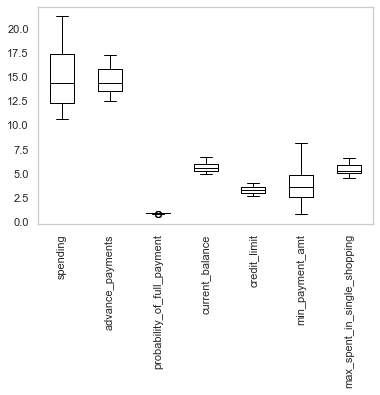

<Figure size 2880x1440 with 0 Axes>

In [60]:
df.boxplot(column=["spending","advance_payments","probability_of_full_payment","current_balance","credit_limit","min_payment_amt","max_spent_in_single_shopping"],grid=False,rot=90, color='black')
plt.figure(figsize =(40,20))
plt.tight_layout()             #Outliers are removed now.

# 1.2  Do you think scaling is necessary for clustering in this case? Justify.

 As the values of the variables are different,we should do scaling otherwise "spending","advance_payments" are in different
values and this may get more weightage than the other variables.Scaling will have all the values in the relative same range.
Clustering on the non-normalised data fails. Clustering on the normalised data works very well.
k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so we should normalize the data.
I have used minmax scaling to standarise the data to relative same scale -3 to +3

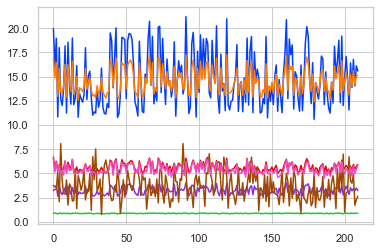

In [61]:
# prior to scaling 
plt.plot(df)
plt.show()


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [63]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
print(scaled_df)

[[0.8829084  0.93181818 0.60889292 ... 0.80755524 0.33999474 1.        ]
 [0.50991501 0.51239669 0.89201452 ... 0.67854597 0.35147874 0.30773018]
 [0.78942398 0.8285124  0.67876588 ... 0.80185317 0.35585359 0.80206795]
 ...
 [0.32483475 0.36157025 0.64882033 ... 0.40698503 0.13013832 0.23732152]
 [0.52219075 0.53512397 0.83393829 ... 0.60940841 0.20574132 0.4549483 ]
 [0.47025496 0.5661157  0.40471869 ... 0.42836778 0.2563256  0.66962088]]


In [64]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.339995,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.351479,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.355854,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.603853,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.178125,0.648941


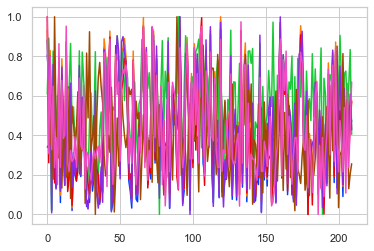

In [65]:
#after scaling
plt.plot(scaled_df)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them



In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage   ##Importing dendrogram and linkage module
                                                          #Agglomerative clustering

In [67]:
##Choosing ward linkage method

In [68]:

wardlink= linkage(scaled_df, method = 'ward')



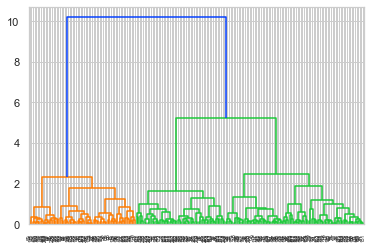

In [69]:
warddend=dendrogram(wardlink)

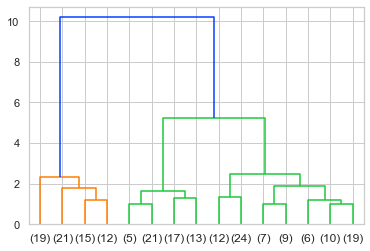

In [70]:
                         #Plot the truncated dendrogram with the last 15 clusters.
warddend = dendrogram(wardlink,truncate_mode='lastp',p = 15)               # we are looking at the last 15 merges
                 


In [71]:
##Method 2:Choosing average linkage method

In [72]:
averagelink= linkage(scaled_df, method = 'average')              #choosing average linkage method


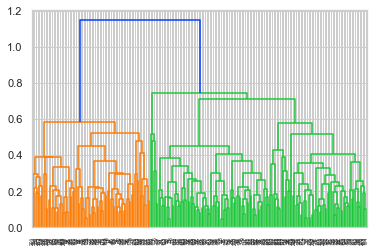

In [73]:
averagedend=dendrogram(averagelink)

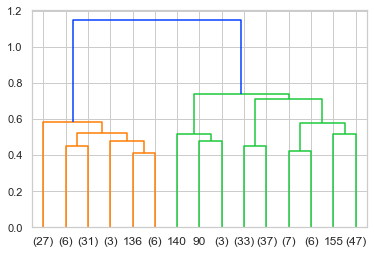

In [74]:
#Plot the truncated dendrogram with the last 15 clusters.
averagedend = dendrogram(averagelink,truncate_mode='lastp',p = 15)# we are looking at the last 15 merges
                 


In [75]:
from scipy.cluster.hierarchy import fcluster

In [76]:
#method 1:maxclust
clusters_maxclust = fcluster(averagelink, 3, criterion='maxclust')
clusters_maxclust

array([1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1,
       1, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1], dtype=int32)

In [77]:
#method 2:distance
clusters_distance = fcluster(averagelink,0.7,criterion='distance')
clusters_distance

array([1, 4, 1, 3, 1, 2, 3, 4, 1, 3, 1, 4, 3, 1, 4, 3, 4, 3, 3, 3, 3, 3,
       1, 3, 4, 1, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1, 4, 1, 1,
       3, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 4, 3, 3, 4, 4, 1,
       1, 4, 1, 3, 4, 3, 1, 1, 3, 1, 4, 3, 1, 4, 4, 4, 4, 1, 3, 4, 1, 1,
       1, 2, 2, 1, 4, 3, 3, 1, 1, 1, 3, 1, 3, 1, 4, 1, 4, 1, 1, 3, 3, 1,
       1, 4, 1, 3, 3, 1, 4, 2, 3, 1, 4, 3, 3, 3, 4, 4, 1, 3, 4, 4, 3, 4,
       4, 1, 3, 1, 1, 3, 1, 4, 2, 4, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 4, 1,
       4, 4, 3, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 4, 4, 3, 4, 3, 4, 1, 1, 1,
       4, 4, 1, 3, 4, 3, 4, 4, 1, 1, 4, 4, 4, 3, 4, 4, 3, 1, 4, 1, 1, 3,
       1, 3, 4, 1, 4, 3, 1, 4, 1, 4, 1, 1], dtype=int32)

Lets now go ahead and attach these clusters with the original dataframe and try to interpret it from buisness perspective.

In [78]:
df["clusters_hierarchial"]=clusters_maxclust
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchial
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.



In [79]:
from sklearn.cluster import KMeans 


In [80]:
#Since we don not know the number of optimum number of clusters,lets define the empty list to being the process of automating the calculation of "inertia" or within sum of squares (WSS) for 2 to 9 clusters

wss =[] 
for i in range(2,9):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [81]:
# Within Cluster Sum of Squares
wss

[35.54500790058068,
 22.571239439804447,
 19.237881246479358,
 16.714336812495038,
 14.866714719283141,
 13.622252807940455,
 12.66614203614209]

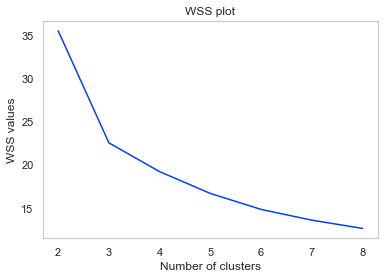

In [82]:
plt.plot(range(2,9),wss)
plt.grid()
plt.title("WSS plot")
plt.xlabel("Number of clusters")
plt.ylabel("WSS values")
plt.show()

The ideal WSS plot has to be a sharp elbow like structure.The number of clusters corresponding to that elbow like graph is considered to be the most optimum. Having said that, we'll go for 3 clusters.

In [83]:
#Forming 2 Clusters with K=2
## Create K Means cluster and store the result in the object k_means with k=2
k_means2 = KMeans(n_clusters = 2)

# Fit K means on the scaled_df
k_means2.fit(scaled_df)
labels_2 = k_means2.labels_
labels_2

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [84]:
#Forming 3 clusters with k=3 
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
labels=k_means.labels_
labels

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2])

In [85]:
#Forming 4 clusters with k=4
#Create K Means cluster and store the result in the object k_means with k=4
k_means4 = KMeans(n_clusters = 4)

# Fit K means on the scaled_df
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_
labels_4

array([2, 3, 2, 1, 2, 1, 1, 0, 2, 1, 2, 3, 1, 2, 0, 1, 3, 1, 0, 1, 1, 1,
       2, 1, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 0, 2,
       2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 3, 1, 3, 0, 3, 0, 0, 2, 1, 3, 3, 3,
       3, 1, 0, 2, 3, 1, 0, 2, 2, 3, 1, 2, 0, 2, 3, 2, 3, 2, 2, 1, 0, 2,
       3, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 3, 2, 1, 0, 0, 1, 3,
       0, 2, 1, 2, 2, 1, 2, 0, 3, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 3, 3,
       0, 0, 0, 1, 3, 2, 2, 0, 2, 2, 2, 1, 3, 3, 0, 1, 3, 1, 0, 2, 2, 2,
       3, 0, 3, 1, 0, 0, 0, 0, 3, 3, 0, 3, 0, 1, 0, 3, 1, 2, 3, 3, 2, 1,
       2, 1, 0, 3, 3, 1, 3, 0, 3, 0, 3, 3])

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

#Let us check the silhouette score and silhouette width for 2 clusters.
silhouette_score(scaled_df,labels_2)


0.5014598626649691

In [87]:
silhouette_samples(scaled_df,labels_2).min()

0.0028473082217403472

In [88]:
#Let us check the silhouette score and silhouette width for 3 clusters.
silhouette_score(scaled_df,labels)


0.4194919669451009

In [89]:
silhouette_samples(scaled_df,labels).min()

0.008994100160658703

In [90]:
#Let us check the silhouette score and silhouette width for 4 clusters
silhouette_score(scaled_df,labels_4)

0.3361727552521399

In [91]:
silhouette_samples(scaled_df,labels_4).min()

-0.0014009442969584623

In [92]:
df["clus_kmeans"]=labels
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchial,clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0
...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3,2
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1,0
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,2


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [93]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchial,clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [94]:
#Export the dataframe thus created with the clusters into a csv file.
df.to_csv('H_Cluster_project.csv')

In [95]:
#Now let's try to compare the different clusters with average values and try to interpret the problem.

In [96]:
df_clust=df.groupby("clusters_hierarchial").mean()     #cluster profiles

In [97]:
df_clust=df_clust.reset_index()

In [98]:
df_clust

,clusters_hierarchial,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clus_kmeans
0,1,18.243243,16.096892,0.883335,6.144635,3.667162,3.580662,6.003392,0.270270
1,2,13.990000,13.996000,0.896140,5.321800,3.287600,6.734250,4.994800,1.600000
2,3,12.962061,13.712214,0.863070,5.348702,3.026710,3.647253,5.087557,1.427481


In [99]:
cluster_freq=df["clusters_hierarchial"].value_counts().sort_index()
cluster_freq

1     74
2      5
3    131
Name: clusters_hierarchial, dtype: int64

In [100]:
df_clust["Frequency"]=cluster_freq.values

In [101]:
df_clust

,clusters_hierarchial,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clus_kmeans,Frequency
0,1,18.243243,16.096892,0.883335,6.144635,3.667162,3.580662,6.003392,0.270270,74
1,2,13.990000,13.996000,0.896140,5.321800,3.287600,6.734250,4.994800,1.600000,5
2,3,12.962061,13.712214,0.863070,5.348702,3.026710,3.647253,5.087557,1.427481,131


In [102]:
## CLUSTER GROUP PROFILES:

Cluster 0: Customers under cluster 0 have high spending,current balance,credit limit,current balance,maximum spend in single 
    shopping,probability of full payment.This indicates they are premium  high net worth customers who make expensive purchases
    on their credit card.
    
Cluster 1: Customers here have comparatively lesser spending,current balance,credit limit,current balance,maximum spend in single 
    shopping,probability of full payment.They can be upper middle class customers.The bank can help them with offers so that they
    can increase their spending and make a transition into premium customers.
    
Cluster 2:  They have the least spending and credit limit.It indicates they have recently bought credit cards or they have started 
    working recently.They can increase their spending habits by tieing up with grocery stores ,utilities etc.
    

# Problem 2: CART-RF

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

In [103]:
import pandas as pd
data=pd.read_csv("insurance_part2_data.csv")

In [104]:
data

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [105]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [106]:
data.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [107]:
data.shape

(3000, 10)

In [108]:
data.info()         #Out of the 10 columns, 6 are object type, 2 are int and while remaining 2 are float type .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [109]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [110]:
data.describe(percentiles=[.25,0.50,0.75,0.90]).T 

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


In [111]:
for column in data[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:            #Getting unique count of all nominal variables
    print(column.upper(),': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




TREATING BAD DATA

In [112]:
#duration has negative value.It is not possible.
 #"Commision" & "Sales"- mean and median varies signficantly

In [113]:
data[data['Duration'] == -1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [114]:
data['Duration'].mean()
                        

70.00133333333333

In [115]:
data['Duration'] = data['Duration'].replace(to_replace=-1, value=data['Duration'].mean())

In [116]:
data.loc[1508]            #checking the duration== -1 row.It has been replaced by the mean of duration column.

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration          70.001333
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

In [117]:
data.duplicated().sum()       #checking for duplicates
#We are not removing duplicates.Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

139

UNIVARIATE ANALYSIS

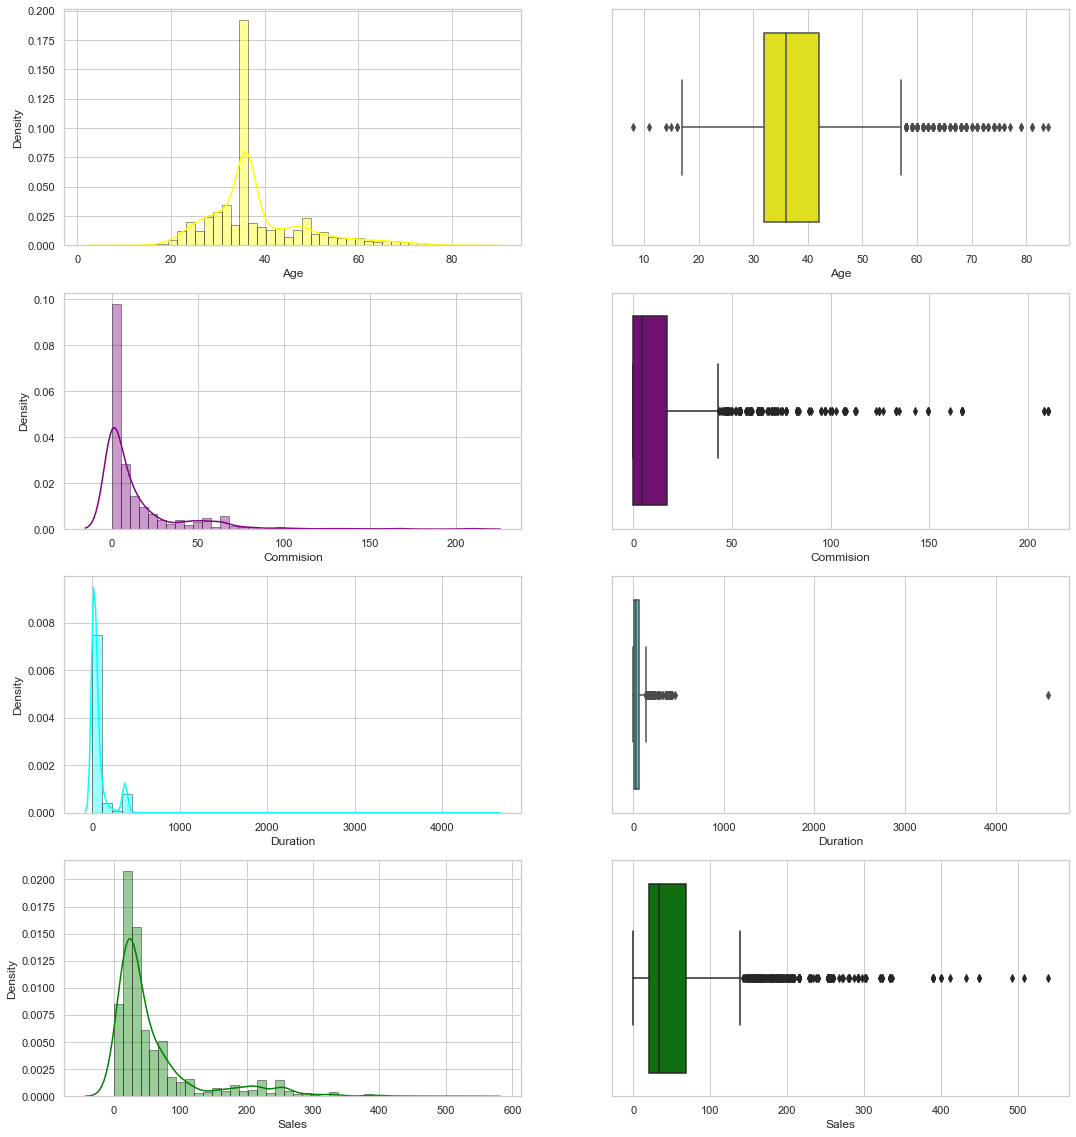

In [118]:

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (18,20))
sns.distplot(data['Age'], bins = 40, ax = axs[0][0],color="yellow",hist_kws= dict(ec = 'black'));
sns.distplot(data['Commision'], bins = 40, ax = axs[1][0], color= "purple",hist_kws= dict(ec = 'black'));
sns.distplot(data['Duration'], bins = 40, ax = axs[2][0], color= "cyan",hist_kws= dict(ec = 'black'));
sns.distplot(data['Sales'], bins = 40, ax = axs[3][0], color= "green",hist_kws= dict(ec = 'black'));

sns.boxplot(data['Age'], ax = axs[0][1],color="yellow");
sns.boxplot(data['Commision'], ax = axs[1][1], color= 'purple');
sns.boxplot(data['Duration'], ax = axs[2][1], color= "cyan");
sns.boxplot(data['Sales'], ax = axs[3][1], color= "green");

In [119]:
from scipy.stats import skew 
data.skew()   # to measure the skeweness of every attribute


Age           1.149713
Commision     3.148858
Duration     13.786136
Sales         2.381148
dtype: float64

In [120]:
round(data.kurt(),2)
    #Kurtosis

Age            1.65
Commision     13.98
Duration     427.66
Sales          6.16
dtype: float64

Observations:

For all the above variables, mean is greater than median, hence it is positively skewed.
"Sales", "Commision" and "Duration" all 3 variables are positively Skewed with too many outliers
"Age" variable is little right skewed with too many outliers. There are outliers in all the variables.
CART and Random Forest are robust to outliers. Neural Networks can handle outliers if there are more hidden layers and 
if the number of outliers is lesser. For now, we are treating the outliers using IQR.



MULTIVARIATE ANALYSIS

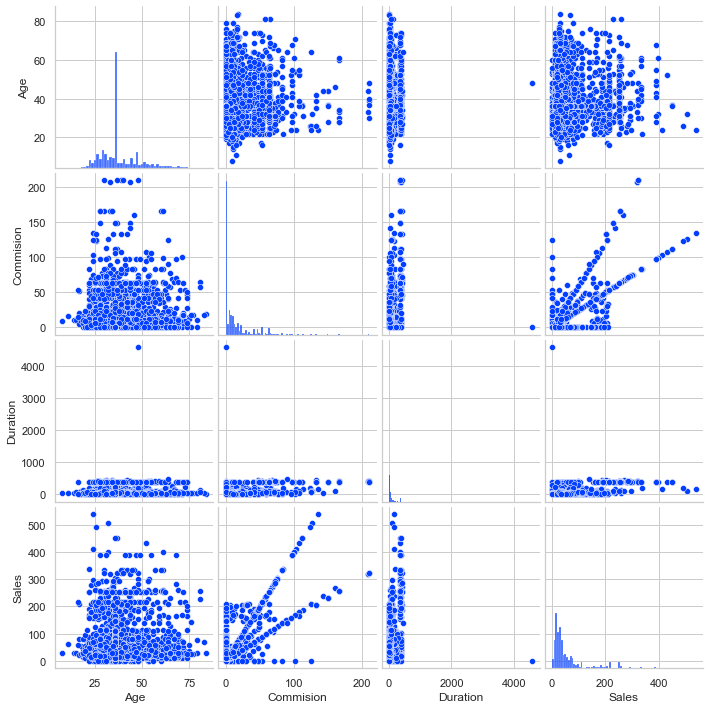

In [121]:
sns.pairplot(data)

In [122]:
corr=data.corr().T
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030206,0.039455
Commision,0.067717,1.000000,0.471354,0.766505
Duration,0.030206,0.471354,1.000000,0.558851
Sales,0.039455,0.766505,0.558851,1.000000


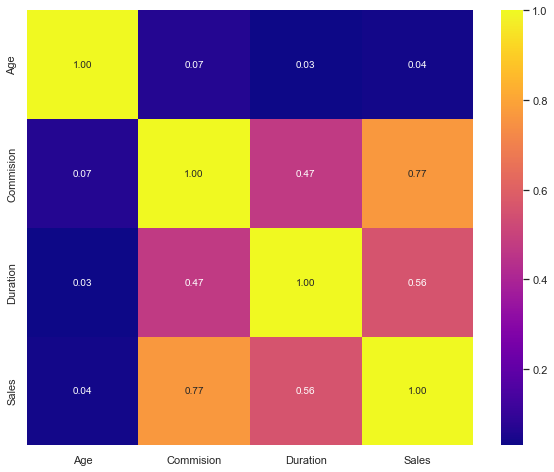

In [123]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="plasma")
plt.show()

# 2.2 Data Split: Split the data into test and train(0.5 pts), build classification model CART (2.5 pts), Random Forest (2.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [124]:

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [125]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 234.5+ KB


In [126]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes

In [127]:
data.info()                #all object data types got converted in either float or int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 111.5 KB


In [128]:
data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [129]:
data.Claimed.value_counts()  # Let us check the proportion of our target variable
                                # Claimed "No" = 0
                                 # Claimed "Yes" = 1


0    2076
1     924
Name: Claimed, dtype: int64


Building CART / Decision Tree Model


Extracting the target column into separate vectors for training set and test set


In [130]:
X = data.drop("Claimed", axis=1)
y = data.pop("Claimed")
X.head()              ## capture the target column ("default") into separate vectors for training set and test set


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


Splitting data into training and test sets

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Checking the dimensions of the training and test data

In [132]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


Building a Decision Tree Classifier


In [133]:
# Initialising Decision Tree Classifier

dt_model = DecisionTreeClassifier()

In [134]:
# Fitting  the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [135]:
from sklearn import tree


In [136]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/



Variable Importance

In [137]:
dt_model.feature_importances_


array([0.18235269, 0.19961646, 0.00114916, 0.07931639, 0.00726161,
       0.26306558, 0.21048211, 0.03624793, 0.02050807])

In [138]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.263066
Sales         0.210482
Agency_Code   0.199616
Age           0.182353
Commision     0.079316
Product Name  0.036248
Destination   0.020508
Channel       0.007262
Type          0.001149


Predicting Test Data


In [139]:
y_predict = dt_model.predict(X_test)

In [140]:
y_predict.shape


(900,)

In [141]:
y_predict

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

Regularising the Decision Tree

Adding Tuning Parameters

Executing 1st time Grid search CV

In [142]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,30,50],
    'min_samples_leaf': [75,100,150,200], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)


In [143]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 75, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=300,
                       random_state=1)

In [144]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)


In [145]:
from sklearn.metrics import classification_report
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1471
           1       0.65      0.60      0.62       629

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.78      0.78      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.52      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



Executing 2nd time Grid search CV


In [146]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,30,50],
    'min_samples_leaf': [50,75,100,150], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)


In [147]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [148]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)


In [149]:
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [150]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)
reg_dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

Generating New Tree

In [151]:
dt_tree_regularized = open('dt_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= dt_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

dt_tree_regularized.close()
dot_data

Variable importance

In [152]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


Predicting on Training and Test dataset

In [153]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [154]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)


ytrain_predict (2100,)
ytest_predict (900,)


Getting the Predicted Classes

In [155]:
ytest_predict


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

Getting the Predicted Probabilities

In [156]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob


array([[0.93571429, 0.06428571],
       [0.52941176, 0.47058824],
       [0.35862069, 0.64137931],
       ...,
       [0.35862069, 0.64137931],
       [0.88405797, 0.11594203],
       [0.88405797, 0.11594203]])

In [157]:
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


DECISION TREE Model Evaluation

Measuring AUC-ROC Curve

AUC and ROC for the training data


In [158]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.836


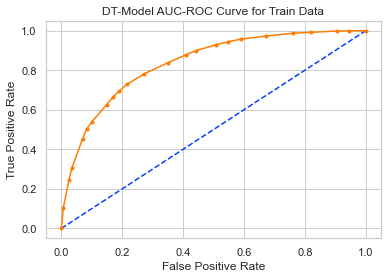

In [159]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('DT-Model AUC-ROC Curve for Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC and ROC for the test data

AUC - Test 0.7940635943409442


Text(0, 0.5, 'True Positive Rate')

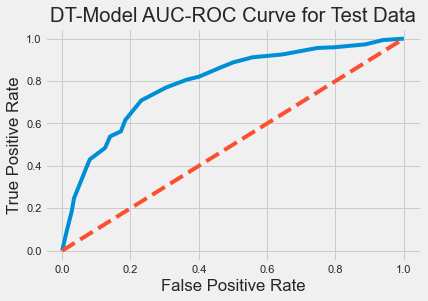

In [160]:
# predict probabilities
probs_test = reg_dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:,1]

# calculate AUC
auc_test = roc_auc_score(test_labels,probs_test)
print('AUC - Test', auc_test)
# calculate roc curve
fpr_test,tpr_test,thresh_test = roc_curve(test_labels,probs_test)

# plot the roc curve for the model
plt.style.use('fivethirtyeight')
g = sns.lineplot(x = fpr_test, y = tpr_test)
g.plot([0,1],[0,1], linestyle = 'dashed');
plt.title('DT-Model AUC-ROC Curve for Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Confusion Matrix for the training data of Decision Tree

In [161]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix


In [162]:
confusion_matrix(train_labels,ytrain_predict)

array([[1349,  122],
       [ 313,  316]], dtype=int64)

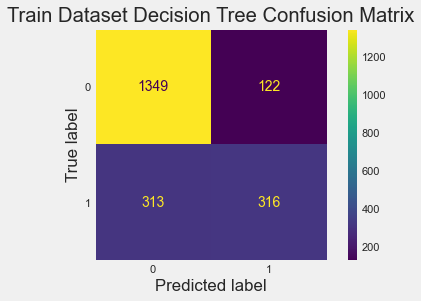

In [163]:
# well formatted confusion matrix output
plot_confusion_matrix(reg_dt_model,X_train, train_labels);
plt.title('Train Dataset Decision Tree Confusion Matrix')
plt.grid(b = False, which = 'both', axis = 'both');

In [164]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 


0.7928571428571428

In [165]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



Confusion Matrix for test data of Decision Tree

In [166]:
confusion_matrix(test_labels, ytest_predict)


array([[564,  41],
       [183, 112]], dtype=int64)

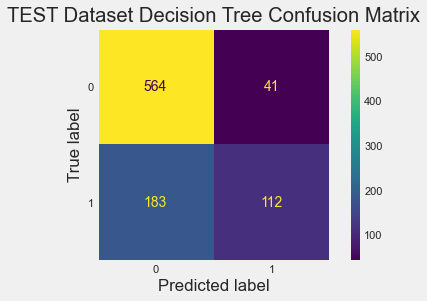

In [167]:
plot_confusion_matrix(reg_dt_model, X_test, test_labels)
plt.title('TEST Dataset Decision Tree Confusion Matrix')
plt.grid(b = False, which = 'both', axis = 'both');


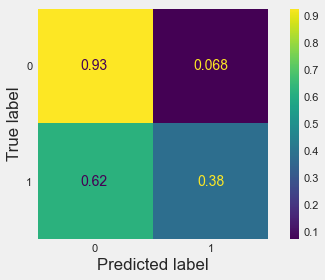

In [168]:
plot_confusion_matrix(reg_dt_model, X_test, test_labels,
                     normalize = 'true')
plt.grid(b = False, which = 'both', axis = 'both');


In [169]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)


0.7511111111111111

In [170]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [171]:
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))


Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



Conclusion

Accuracy on the Training Data: 79%
Accuracy on the Test Data: 75%

AUC on the Training Data: 83%
AUC on the Test: 80%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Random Forest Classifier

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,
                              max_features=4,
                              random_state=1)
rfcl = rfcl.fit(X_train, train_labels)


In [173]:
rfcl

RandomForestClassifier(max_features=4, random_state=1)

In [174]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [175]:
rfcl.score(X_train,train_labels)


0.9947619047619047

Random Forest Classifier accracy score is very high so we will tune all the Parameters using Grid serch CV

Executing Grid Search Cv for RF Modal for first Time

In [176]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,6],
    'max_features': [4,5],
    'min_samples_leaf': [11,15],
    'min_samples_split': [50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2)


In [177]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [11, 15],
                         'min_samples_split': [50, 55],
                         'n_estimators': [290, 350, 400]})

In [178]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 290}

In [179]:
best_grid = grid_search.best_estimator_

Predicting Training and Test Data

In [180]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [181]:
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))


Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



Executing Grid Search Cv for RF Modal for first Time

In [182]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [30,40],
    'max_features': [5,8,9],
    'min_samples_leaf': [11,50,100],
    'min_samples_split': [55,60,70], 
    'n_estimators': [100,200,350] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [183]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30, 40], 'max_features': [5, 8, 9],
                         'min_samples_leaf': [11, 50, 100],
                         'min_samples_split': [55, 60, 70],
                         'n_estimators': [100, 200, 350]})

In [184]:
grid_search.best_params_


{'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 55,
 'n_estimators': 200}

In [185]:
best_grid = grid_search.best_estimator_

In [186]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [187]:
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))


Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.66       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900




Performance Evaluation of Random Forest Classifier

Random Forest Classifier TRAIN DATA Confusion Matrix

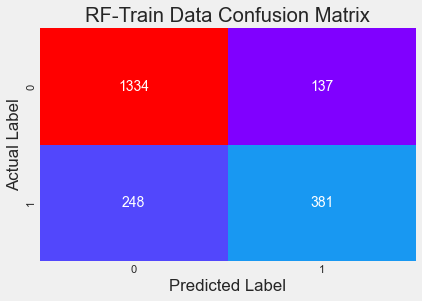

In [188]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF-Train Data Confusion Matrix')
plt.show()


Random forest Model ROC Curve of Train data


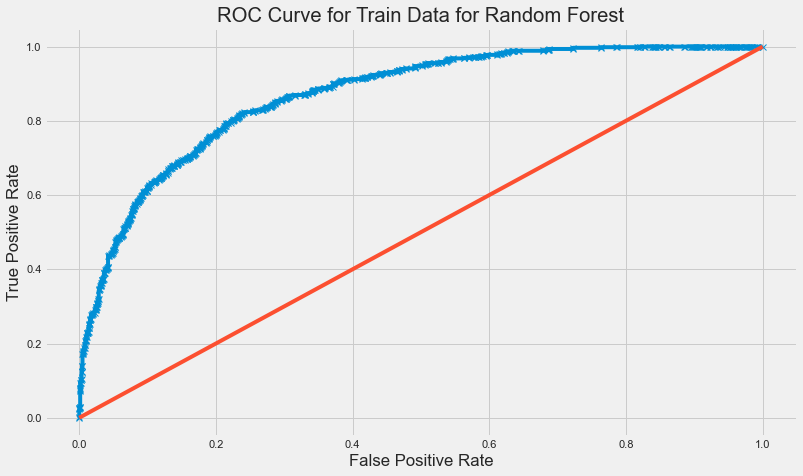

Area under Curve is 0.869469521506951


In [189]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))


Random Forest Confusion Matrix of Test data

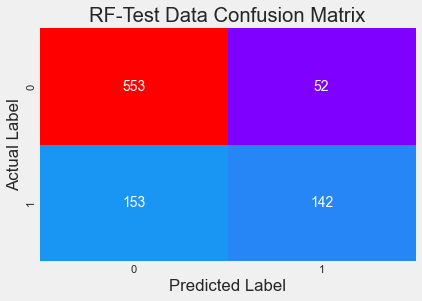

In [190]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF-Test Data Confusion Matrix')
plt.show()


In [191]:
best_grid.score(X_test,test_labels)


0.7722222222222223

Random Forest ROC Curve of Test data


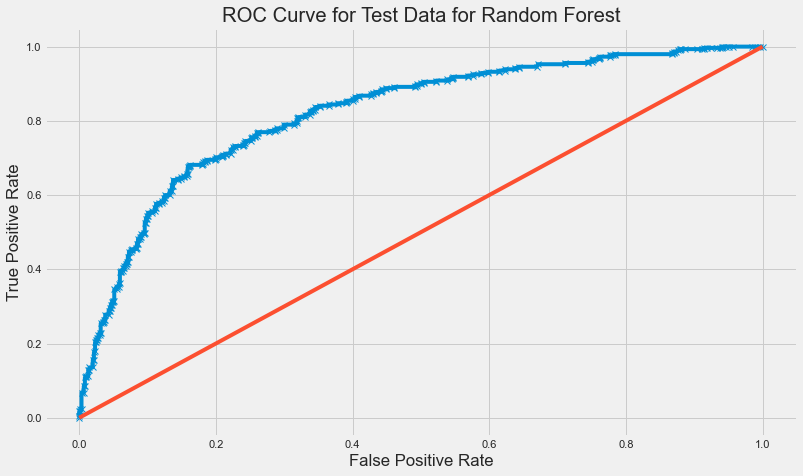

Area under Curve is 0.8210645748704299


In [192]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))


Result:
Random Forest Train Set & Random Forest Test Set Accuracy 0.82, 0.77 AUC 0.87, 0.83 Recall 0.61, 0.48 Precision 0.74, 0.73 F1 Score 0.66, 0.58

From the Random Forest model,looking at the Accuracy,Sensitivity,Specificity,Recall and AUC, Train and Test data are almost Similar so this is optimized model

ANN MODAL BUILDING AND PERFORMACE CHECK

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=.30, random_state=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


Scaling the variables

In [200]:
from sklearn.preprocessing import StandardScaler
#Initialize an object for StandardScaler
sc = StandardScaler()
#Scale the training data
x_train = sc.fit_transform(X_train)
x_train


array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [201]:
# Apply the transformation on the test data
x_test = sc.transform(X_test)
x_test


array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

Building Neural Network Model

In [202]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  
                    random_state=1,tol=0.01)

In [203]:
# We can also try below parameters Building and Training the modal 
#clf = MLPClassifier(hidden_layer_sizes=300, max_iter=500, verbose=True, random_state=1, tol=0.001)



In [204]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.73190828
Iteration 2, loss = 0.70481842
Iteration 3, loss = 0.67377712
Iteration 4, loss = 0.64619472
Iteration 5, loss = 0.62272023
Iteration 6, loss = 0.60330223
Iteration 7, loss = 0.58732612
Iteration 8, loss = 0.57422402
Iteration 9, loss = 0.56310704
Iteration 10, loss = 0.55382327
Iteration 11, loss = 0.54599574
Iteration 12, loss = 0.53911673
Iteration 13, loss = 0.53335898
Iteration 14, loss = 0.52839899
Iteration 15, loss = 0.52391237
Iteration 16, loss = 0.51999360
Iteration 17, loss = 0.51649432
Iteration 18, loss = 0.51346008
Iteration 19, loss = 0.51074817
Iteration 20, loss = 0.50822930
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

Predicting training data


In [205]:
# use the model to predict the training data
y_pred1 = clf.predict(x_train)


Evaluating model performance on training data


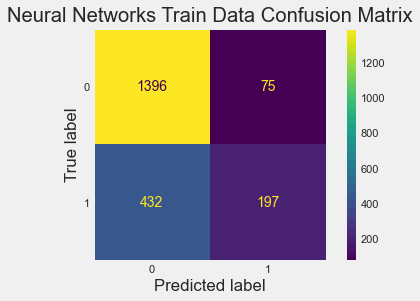

In [206]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
plot_confusion_matrix(clf,x_train,y_train)
plt.title('Neural Networks Train Data Confusion Matrix')
plt.grid(b=False,axis='both');

In [207]:
clf.score(x_train,y_train)


0.7585714285714286

In [208]:
print(classification_report(y_train, y_pred1))


              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100



AUC: 0.792


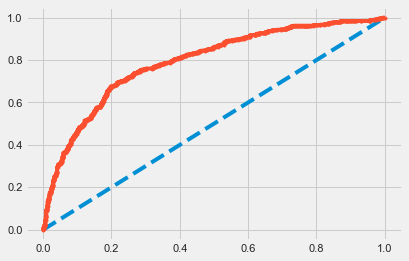

In [209]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


Predicting Test Data and comparing model performance

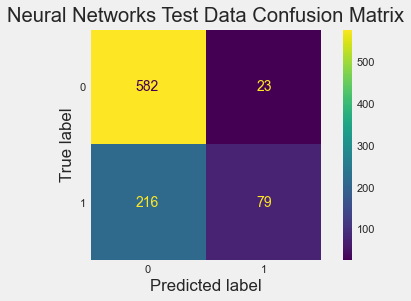

In [210]:
y_pred = clf.predict(x_test)
plot_confusion_matrix(clf,x_test,y_test)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.grid(b = False, which='both');

In [211]:
clf.score(x_test,y_test)


0.7344444444444445

Classification Report for Train and Test Dataset for Initial ANN Modal

In [212]:
print("Classification report for Train Dataset for Initial modal","\n",classification_report(y_train, y_pred1))

print("Classification report for Test Dataset for Initial modal","\n",classification_report(y_test, y_pred))


Classification report for Train Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100

Classification report for Test Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       605
           1       0.77      0.27      0.40       295

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.61       900
weighted avg       0.74      0.73      0.69       900



AUC: 0.767


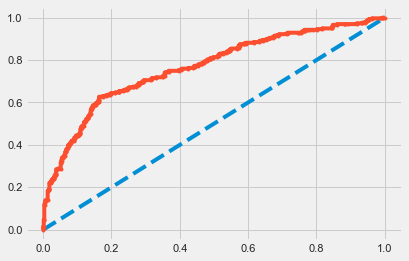

In [213]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


Model Tuning through Grid Search
Below Code may take too much time.These values can be used instead {'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,100,200,300,500],
    'max_iter': [500,750,1000,3000],
    'solver': ['sgd','adam'],
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 10)


In [215]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200, 300, 500],
                         'max_iter': [500, 750, 1000, 3000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001]})

In [216]:
grid_search.best_params_


{'hidden_layer_sizes': 300, 'max_iter': 500, 'solver': 'adam', 'tol': 0.001}

In [217]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=300, max_iter=500, random_state=1, tol=0.001)

Prediction & Evaluation on Train Data

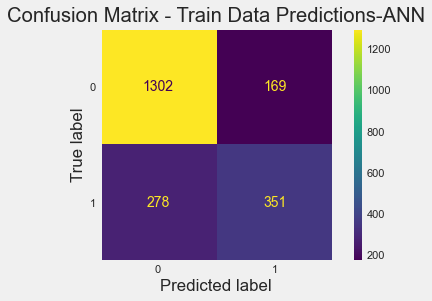

In [218]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)
plot_confusion_matrix(best_grid,x_train,y_train)
plt.grid(b = False, which='both')
plt.title('Confusion Matrix - Train Data Predictions-ANN');


In [219]:
confusion_matrix(y_train,ytrain_predict) # alternate method to print CM

array([[1302,  169],
       [ 278,  351]], dtype=int64)

In [220]:
best_grid.score(x_train,y_train)

0.7871428571428571

In [221]:
print(classification_report(y_train,ytrain_predict))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



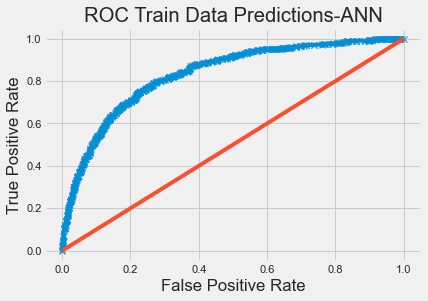

Area under Curve is 0.8322431881235415


In [222]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,
                                           best_grid.predict_proba(x_train)[:,1]))

Prediction & Evaluation on Test Data

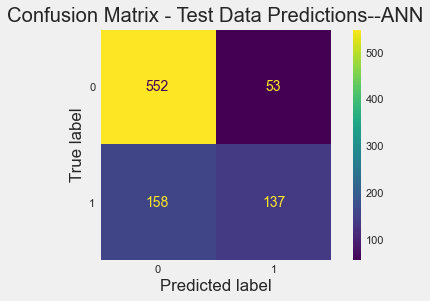

In [223]:
plot_confusion_matrix(best_grid, x_test,y_test)
plt.grid(b = False, which='both');
plt.title('Confusion Matrix - Test Data Predictions--ANN');

In [224]:
best_grid.score(x_test,y_test)

0.7655555555555555

Classification Report for both Train and Test Dataset for best ANN Modal


In [225]:
print("A--Classification report for Train Dataset for Hypertuned modal","\n",classification_report(y_train,ytrain_predict))
print("B--Classification report for Test Dataset for Hypertuned modal","\n",classification_report(y_test,ytest_predict))


A--Classification report for Train Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100

B--Classification report for Test Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



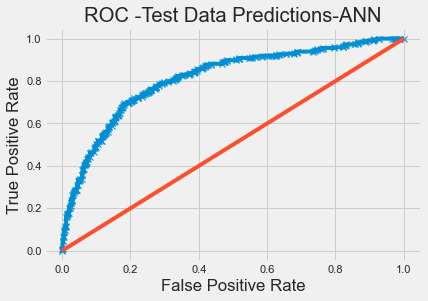

Area under Curve is 0.8134220479058691


In [226]:

#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -Test Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

Conclusion


Neural Network Train set Neural Network Test set

**Accuracy 0.79 0.77

**AUC 0.84 0.82

**Recall 0.56 0.46

**Precision 0.68 0.72

**F1 Score 0.61 0.56

Accuracy on the training data is 79% and on test data is 77%. The precision and recall metrics are also almost similar between training and test set, which indicates no overfitting or underfitting has happened.



# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


In all the models, Train and Test results are very much same, but we have to compare all the Models and find out the best model among all.
we can notice here on the table that in Random Forest Model, the Train and test set results are highest among all the models. So, we can conclude that Random Forest model is the best/optimized Model. Neural network Model has given optimum results, but their results are lesser optimized in comparison to Random Forest Model. Thus, this model is performed model after random forest model. In the CART test model, both Train and Test set results are the lowest compared to all .so this is the least Optimized Model.


# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations


Following are my Suggestions to Management

• We can see 90% of insurance is done by online mode, so we can increase their online experiences and also show the reviews about their insurance for benefitted customers.This will increase the Confidence of customerS which will increase the insurance sales and profit too.

• More sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline (See Box plot below. So have to find out why this is happening?

• We need to talk with JZI & CWT agency to pick up sales as they Have lower sales , We can also tell them to use Digital marketing tools to increase their reach to the customers .

• Insurance Company can also increase their Insurance Portfolio by adding more insurance plans like health insurance , Corporate accidental Insurance etc to increase their revenue.

Below are the some Key performance indicators (KPI) of insurance claims are:  Average Cost Per Claim

 Claim Frequency

 Average Time to Settle a Claim

 Claims Ratio

 Increase customer satisfaction

Based on the above Insurance Company can make automated reporting process to senior officials of the company if a claim is pending from more than 1 week so that genuine claims can’t be neglected; this will Build the reputation of the company in the customer’s eye.